> ⚠️ **Instrucciones**:
> - Si deseas ejecutar este notebook, sube tu propio archivo `greek_gods_v2.csv` o usa tu propia API de Kaggle.
> - Este cuaderno está optimizado para exploración de datos educativos. Asegúrate de adaptar las rutas si lo usas en local.


# 📘 This notebook was created as part of my journey to become a top 5 world-class data scientist.
## It explores a dataset of Greek gods and goddesses using modern pandas techniques,
### including groupby, pivot_table, gender inference from text, and visualizations with seaborn.

## ⚠️ If you are running this notebook, remember:
### - You must upload the dataset manually or use your own Kaggle API credentials.
#### - You can adapt the data loading section according to your preferred environment.

### 🧠 Goal: Train both technical and analytical thinking using creative datasets.


# Objetivos del estudio del día de hoy, día 12
* .pivot_table() --> tablas dinámicas tipo excel en Pandas
* .groupby() --> con múltiples columnas- para comparar subcategorias
* Análisis comparativo - por ejemplo: ¿Qué subtipos son más comunes de cada tipo?
* Visualizacion profesional - con seaborn o matplotlib para comunicar los hallazgos.
* Criterio analítico - para sacar conclusiones útiles y presentables

In [1]:
# === Entorno de Ciencia de Datos: Configuración Inicial ===

# Librerias fundamentales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Manejo de advertencias
import warnings

# Ignoramos warnings de pandas deprecation durante la exploración
# Nota: Revisar antes de producción
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# Estilo y estética global de gráficos
plt.rcParams['figure.figsize'] = (12, 8)  # Tamaño estandar para todos
plt.rcParams['font.size'] = 11            # Texto legible profesional
sns.set_style("whitegrid")                # Fondo con grilla sutil
sns.set_palette("husl")                   # Colores armónicos automáticos

In [7]:
# === Dataset Loading Instructions ===

# Option 1: Upload the dataset manually if you're using Google Colab
# from google.colab import files
# uploaded = files.upload()

# Option 2: Use your own Kaggle API to download the dataset
# Steps:
# 1. Go to https://www.kaggle.com > Account > Create New API Token
# 2. Upload kaggle.json here
# 3. Then run:

# import os
# import zipfile
# os.environ['KAGGLE_CONFIG_DIR'] = '/content'

# !kaggle datasets download -d katrinaalaimo/list-of-greek-gods-and-goddesses
# with zipfile.ZipFile("list-of-greek-gods-and-goddesses.zip", 'r') as zip_ref:
#     zip_ref.extractall("greek_gods_data")


# Then load the file:
# df = pd.read_csv("greek_gods_data/greek_gods_v2.csv")

In [8]:
from google.colab import files
uploaded = files.upload()


Saving greek_gods_v2.csv to greek_gods_v2.csv


In [13]:
df= pd.read_csv('greek_gods_v2.csv')
df.head()

,name-english,name-greek,main-type,sub-type,description
0,Aphrodite,Ἀφροδίτη,god,olympian,"goddess of beauty, love, desire, and pleasure"
1,Apollo,Ἀπόλλων,god,olympian,"god of music, arts, knowledge, healing, plague..."
2,Ares,Ἄρης,god,olympian,"god of courage, war, bloodshed, and violence"
3,Artemis,Ἄρτεμις,god,olympian,"virgin goddess of the hunt, wilderness, animal..."
4,Athena,Ἀθηνᾶ,god,olympian,"goddess of reason, wisdom, intelligence, skill..."


In [14]:
# Carga del dataset correcto
# df = pd.read_csv('greek_gods_data/greek_gods_v2.csv')
# df.head()

In [15]:
# info general de numero de entradas, datos nulos, tipo de datos, nombre y numero de columnas...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name-english  445 non-null    object
 1   name-greek    445 non-null    object
 2   main-type     445 non-null    object
 3   sub-type      445 non-null    object
 4   description   445 non-null    object
dtypes: object(5)
memory usage: 17.5+ KB


In [16]:
df['main-type'].value_counts()

,count
main-type,
god,307
personification,110
titan,28


# Comenzaremos ya con el analisis comparativo con .pivot_table( ) y .groupby( ).
### Queremos responder a las siguientes preguntas:

* ¿Cuántos dioses hay por tipo?
* ¿Qué subtipos son más comunes dentro de cada tipo?
* ¿Cuántos personajes hay por género y tipo?
* ¿Qué proporción de personajes son dioses masculinos, femeninos, o sin género definido?
* ¿Hay subtipos exclusivos por género?

In [17]:
# Conteo de personajes por main-type
df['main-type'].value_counts()

,count
main-type,
god,307
personification,110
titan,28


Con el conteo de personajes por main-type, el objetivo era identificar qué tipo de entidad divina aparece con más frecuencia en el dataset.

El resultado muestra:

god: 307 personajes → los dioses olímpicos clásicos (Zeus, Hera, Apolo…).

personification: 110 personajes → entidades que representan conceptos abstractos como la muerte (Thanatos), el sueño (Hypnos), o la victoria (Nike).

titan: 28 personajes → la generación anterior a los dioses olímpicos, como Cronos y Rea.

🔍 Comentario personal: Me ha sorprendido ver que los gods superan en número a las personifications. Siempre pensé que había más personificaciones en la mitología griega. Este análisis me ha ayudado a romper ese sesgo inicial.

#### Ahora quiero averiguar cuantos personajes hay de cada género dentro de cada tipo
Para poder hacer eso, como en mi dataset no esta el genero (gender) explicitamente, he pensado en crear una columna de gñenero y asi poder averiguar lo que necesito

In [18]:
# def infer_gender(description):

  # desc = description.lower()  # Pasamos a minñusculas para evitar errores como "GOD" vs "god"
  # if "goddess" in desc:
    # return "female"           # Si dice 'goddess', decimos que es femenina
  # elif "god" in desc:
    # return "male"             # Si dice 'god' (pero no 'goddess'), decimos que es masculino
  # else:
    # return "unknown"          # Si no aparece ninguna, no podemos saberlo

# Esta logica estaba bien pero me di cuenta de un "vacio legal" y es que si el main type no es god, no identificaria el genero, asi que pense en mejorar un poco más la formulacion para encontrar género


In [19]:
def infer_gender(description):
  if pd.isna(description):    # Para evitar errores con valores nulos
    return "unknown"
  desc = description.lower()

# Usamos listas de palabras claves para género masculino y femenino
  female_keywords = ["goddess", "titaness", "nymph", "muse", "she", "daugther", "queen", "maiden"]
  male_keywords = ["god", "titan", "he", "son", "king", "prince"]

# Con este bucle for, si encuentra alguna palabra de la lista, asigna el género correspondiente
  for word in female_keywords:
    if word in desc:
      return "female"
  for word in male_keywords:
    if word in desc:
      return "male"

  # Si no encuentra ninguna, marca como "unknown"
  return "unknown"

pd.isna() es una función de pandas que se usa para detectar valores nulos o faltantes en un dato.
* Si le pasas un valor, devuelve True si está vacío/nulo, y False si tiene algo.
* una cadena vacía " " no es NaN, por eso da False
En la funcion infer_gender lo usamos porque hay que protegerse por si alguna fila no tiene descripción. Si la dejas pasar y haces .lower() sobre un NaN, te dará error como:
* AttributeError: 'float' object has no attribute 'lower'

Eso lo que hace es un control de seguridad. Dice:

“Si la descripción está vacía o es NaN, no analices nada, solo devuelve 'unknown'”.


In [20]:
# A continuacion aplicamos esa funcion a la columna description
df['gender'] = df['description'].apply(infer_gender)
# Esto coge cada fila, lee la descripcion, le pasa la función infer_gender() y guarda el resultado en una nueva columna llamada gender

In [21]:
# Ahora visualizamos el resultado de nuestra nueva columna creada
df['gender'].value_counts()
# Esto muestra cuantos personajes han sido clasificados como: "female", "male", "unknown"

,count
gender,
male,183
female,151
unknown,111


### El anterior procedimiento es para tener una columna de genero para aplicar lo siguiente mejor.
Cuando se usa esto??
* Cuando no tienes una columna explicita, pero puedes deducir valores desde texto
* Se llama feature engineering: crear nuevas variables desde las existentes.
* Es muy útil en clasificación, modelos, análisis exploratorios...

Más adelante, cuando estemos más avanzados en temario, esto se podria mejorar con un NLP (procesamiento de lenguaje natural), usando modelos que detectan género a partir de texto sin necesidad de palabras clave.

## Conteo cruzado con .groupby()

In [26]:
# Queremos saber cuántos personajes hay de cada genero dentro de cada tipo
df.groupby(['main-type', 'gender'])['name-english'].count()

main-type        gender 
god              female     133
                 male       142
                 unknown     32
personification  female       4
                 male        27
                 unknown     79
titan            female      14
                 male        14
Name: name-english, dtype: int64

## Resultados del análisis:
#### Tras el analisis del sesgo, se ve que si que hay un sesgo de género en la mitologia griega.
En los dioses, aparecen una diferencia no demasiado abrupta pues habiendo 142 dioses masculinos, nos encontramos que los femeninos con 133, apenas una diferencia de 9 menos.

Esto es destacable pues en las personificaciones en cambio la diferencia es mayor con 27 masculinos y apenas 4 féminas.

Entre los titanes la igualdad es mas uniforme habiendo el mismo numero de mujeres que de hombres.

Lo que hace pensar de los resultados es sobre todo la gran cantidad de unknown que salieron lo cual podria hacer que las proporciones de género observadas no sean realmente las correctas o tal vez son deidades sin genero,llamadas neutrales, aunque es segunda hipotesis no parece ser la mas adecuada pues en las deidades griegas sin genero definido eran algo relativamente raro.

En conclusion, tenemos una idea parcial de la distribucion del genero pues es casi seguro sesgada por la falta de información o por el sesgo natural de las fuentes, pues segun los autores y versiones el genero en las deidades menos evidentes varian un poco

In [23]:
# el anterior resultado por genero, lo vamoa a transformar en .unstack() para que sea más visual
df.groupby(['main-type', 'gender'])['name-english'].count().unstack()
# Esto es una tabla de resumen comparativa

gender,female,male,unknown
main-type,,,
god,133.0,142.0,32.0
personification,4.0,27.0,79.0
titan,14.0,14.0,NaN


### Vamos a hacer lo mismo para practicar el equivalente con .pivot_table()

In [24]:
pd.pivot_table(df,
               index='main-type',
               columns = 'gender',
               values = 'name-english',
               aggfunc = 'count',
               fill_value = 0
               )
# con esto a continuacion se mostrará fila = tipo de personaje
# columna = género
# celda = cuántos hay de ese tipo y ese género

gender,female,male,unknown
main-type,,,
god,133,142,32
personification,4,27,79
titan,14,14,0


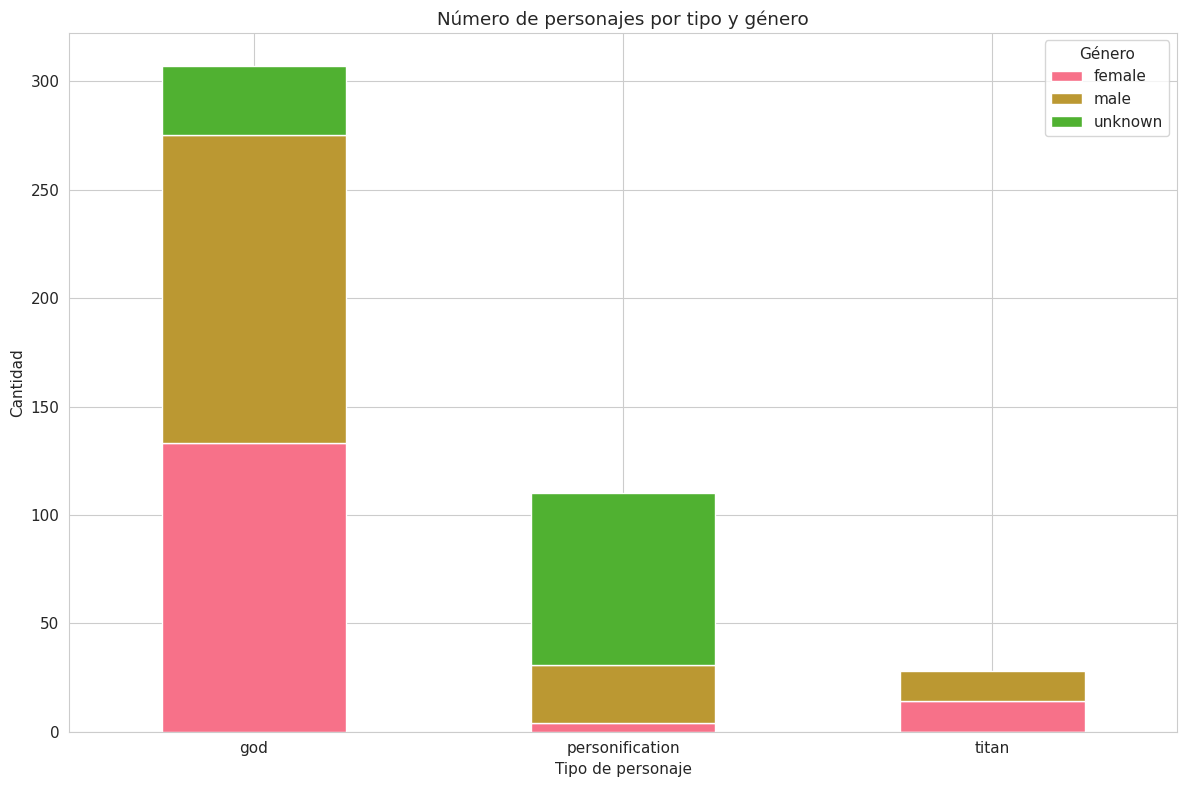

In [25]:
# Vamos a hacer un bonito grafico sobre esta distribución de género
tabla = pd.pivot_table(df,
                      index='main-type',
                       columns = 'gender',
                       values = 'name-english',
                       aggfunc = 'count',
                       fill_value = 0
                       )
tabla.plot(kind='bar', stacked=True)
plt.title("Número de personajes por tipo y género")
plt.xlabel("Tipo de personaje")
plt.ylabel("Cantidad")
plt.xticks(rotation = 0)
plt.legend(title = 'Género')
plt.tight_layout()
plt.show()

# Este es el tipo de grafico apilado muestra el total por main-type y la proporcion por género
# Se dificulta un poco comparar proporciones si los totales son muy diferentes.

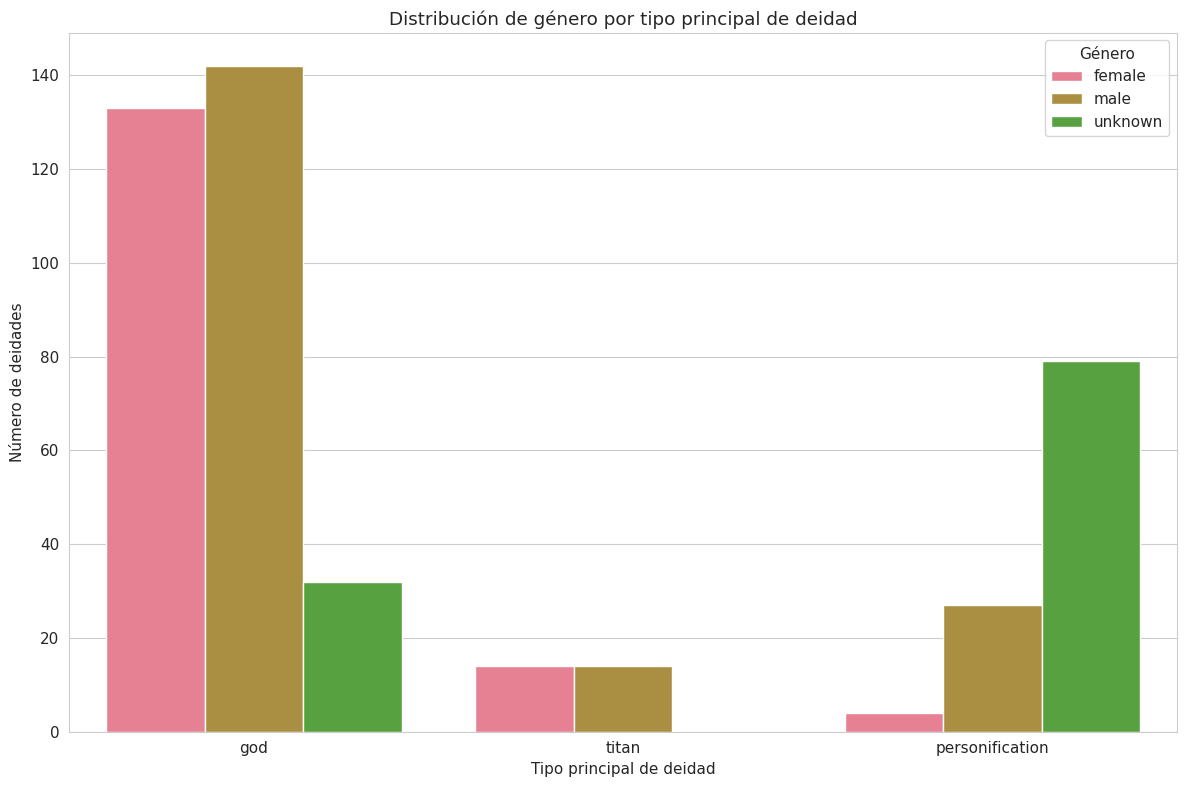

In [27]:
# Vamos a probar este otro, a ver si se ven mejor
# y de paso practico gráficos que he hecho pocos

sns.countplot(data=df, x='main-type', hue='gender')
plt.title('Distribución de género por tipo principal de deidad')
plt.xlabel('Tipo principal de deidad')
plt.ylabel('Número de deidades')
plt.legend(title='Género')
plt.xticks(rotation=0)
plt.tight_layout()

En este grafico se ve mucho mejor que el anterior las proporciones de género con respecto al tipo principal, ademas del "genero" unknown que podrian ser tanto femeninos, como masculinos como neutros, sesgando en parte sin que nos demos cuenta los resultados

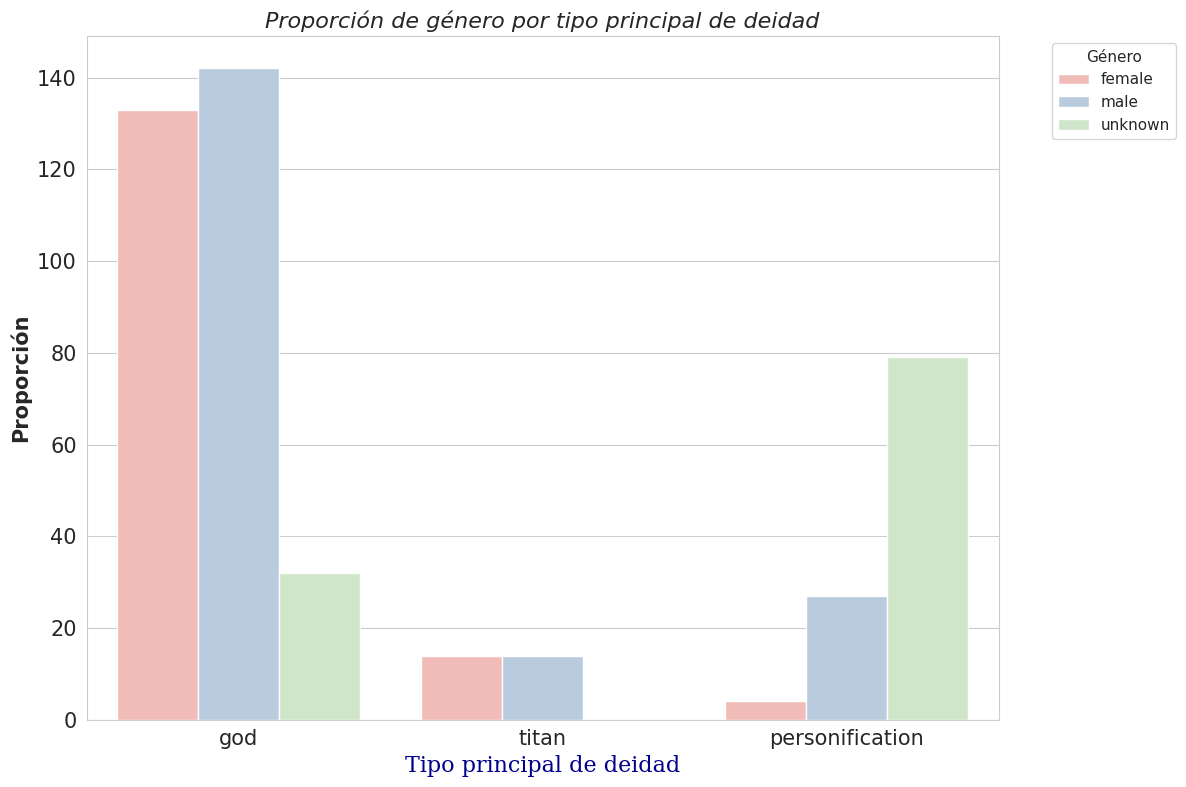

In [28]:
# Hagamos un gráfico de barras con proporciones 100% por tipo y género
# Este gráfico mostrará el porcentaje de cada género dentro de cada tipo:

# Creamos tabla de frecuencias cruzadas
cross_tab = df.groupby(['main-type', 'gender'])['name-english'].count().unstack(fill_value=0)

# Convertimos a proporciones(por fila)
proportions = cross_tab.div(cross_tab.sum(axis=1), axis=0)

# Gráfico

sns.countplot(data=df, x='main-type', hue='gender', palette='Pastel1')
# otros palette interesantes: 'Set2', 'husl', 'sns.color_palette("pastel")', 'sns.color_palette("muted")'

# Podemos cambiar tambien el estilo de fuente
# Se puede usar fuentes como 'serif', 'sans-serif', 'monospace', negrita...
plt.title('Proporción de género por tipo principal de deidad', fontsize=16, style='italic')
plt.xlabel('Tipo principal de deidad', fontsize=16, fontname='serif', color='darkblue')   # Estilo de letra serif y color azul marino
plt.ylabel('Proporción', fontsize=15, weight= 'bold')   # Negrita
# plt.xticks(fontsize=15)    # Aumenta el tamaño de las etiquetas del ejes, es la opcion rapida
# Para un control más fino, util si tanto x como y se ven pequeños
plt.tick_params(axis ='x', labelsize= 15)
plt.tick_params(axis='y', labelsize=15)



plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### como ya hemos visto
#### .pivot_table(), te permite reorganizar una tabla de forma que sea mucho más fácil comparar categorias, subcategorias y valores agregados.
Es como una tabla dinámica de excel: filas, columnas y un valor central.


¿Cuántod personajes hay por combinación de main-type y sub-type?
Esto nos permitirá ver si ciertos subtipos son exclusivos de ciertos tipos principales o si se repiten

In [29]:
pivot = df.pivot_table(
    index = 'main-type',       # Lo que irá como filas
    columns = 'sub-type',      # Lo que irá como columnas
    values = 'name-english',   # Qué valores contamos
    aggfunc = 'count',         # Qué hacemos con ellos (contar nombres)
    fill_value = 0             # Poner 0 en vez de NAN
)
pivot

sub-type,agriculture,chthonic,health,hours,muse,nymph,olympian,other,other titan,personification,primordial,rustic,sea,sky,sleep,twelve titan
main-type,,,,,,,,,,,,,,,,
god,9,21,9,24,20,29,14,43,0,0,21,41,35,37,4,0
personification,0,0,0,0,0,0,0,0,0,110,0,0,0,0,0,0
titan,0,0,0,0,0,0,0,1,15,0,0,0,0,0,0,12


### Visualizacion con heatmap
Una vez hecho, se verá como un mapa de calor para detectar zonas densas de personajes por tipo y subtipo

### Explicacion del siguiente cuadro de codigo
#### Pivot: Es un dataframe con una tabla dinámica que hemos creado, donde las filas son main-type, las columnas son sub-type y el contenido son los conteos de los personajes
#### cada celda representa cuántos personajes hay de un cierto sub-type
dentro de un main-type
#### cmap="YlGnBu": cmap = colormap, define los colores que se usarán para representar los valores.
#### "YlGnBu" significa:
    * Yl = Yellow (amarillo)
    * Gn = Green (verde)
    * Bu = Blue (azul)
  Los valores bajos aparecen en tonos mas claros(amarillos)
  Los valores altos aparecen en tonos más oscuros (azul intenso)
Puedes probar otros como "coolwarm", "viridis", "magma" o "rocket" según el estilo del gráfico.
#### annot=True:
    + annot=True significa que anotas los números dentro de cada celda del mapa de calor.
    + Así, en lugar de solo ver los colores, también puedes leer el número exacto de personajes.
  
#### fmt='d'
 fmt='d' le dice a seaborn que los valores anotados (annot) son enteros (d de decimal).
Si no pones esto, a veces los números salen con decimales tipo 5.0 o incluso 5.000000.

Con 'd', verás simplemente 5.

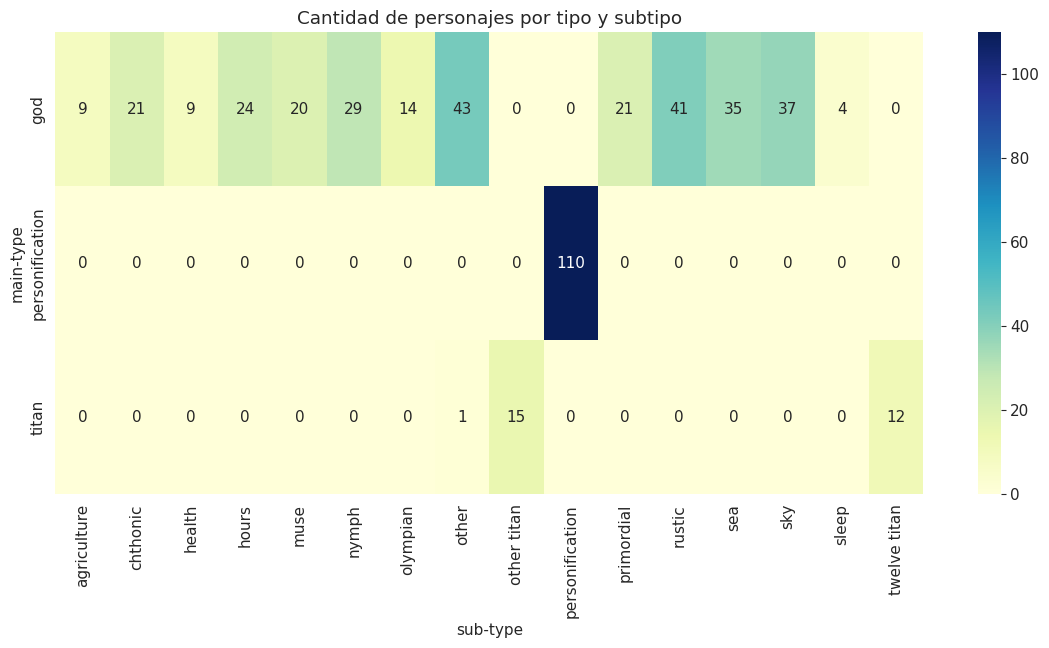

In [30]:
plt.figure(figsize = (14, 6))

sns.heatmap(pivot, cmap = "YlGnBu", annot = True, fmt= 'd')
plt.title('Cantidad de personajes por tipo y subtipo')
plt.show()

## Uso de .groupby() con múltiples columnas en pandas
### El método .groupby() te permite agrupar tu DataFrame por una o más columnas, y luego aplicar funciones de agregación sobre las otras columnas.

#### Por ejemplo, imagina que quieres contar cuántos dioses hay por combinación de main-type y gender (como ya hicimos), pero también podemos hacer cosas más interesantes.



In [31]:
grouped = df.groupby(['main-type', 'gender']).size()
print(grouped)

main-type        gender 
god              female     133
                 male       142
                 unknown     32
personification  female       4
                 male        27
                 unknown     79
titan            female      14
                 male        14
dtype: int64


Lo anterior cuenta el número de filas para cada combinacion de main-type y gender. El resultado es un objeto Series con un indice multi-nivel

### Ejemplo con agregación personalizada
#### Supongamos que tenemos una columna númerica (o quieres obtener otro dato), podemos usar .agg() para aplicar distintas funciones

In [32]:
grouped_stats = df.groupby(['main-type', 'gender']).agg({
    'name-english': 'count',     # contar cuántos
    # Podrias poner otras columnas y funciones
})
print(grouped_stats)

                         name-english
main-type       gender               
god             female            133
                male              142
                unknown            32
personification female              4
                male               27
                unknown            79
titan           female             14
                male               14


En el codigo anterior cada fila es un grupo único de main-type y gender, y la coluna name-english indica la cantidad de registros en ese grupo

In [33]:
# si al código anterior le añadimos .reset_index(), convertimos los indices múltiples en columnas normales, para que luego sea mas fácil trabajar con el Dataframe
grouped_stats = df.groupby(['main-type', 'gender']).agg({
    'name-english': 'count'
}).reset_index()
print(grouped_stats)

         main-type   gender  name-english
0              god   female           133
1              god     male           142
2              god  unknown            32
3  personification   female             4
4  personification     male            27
5  personification  unknown            79
6            titan   female            14
7            titan     male            14


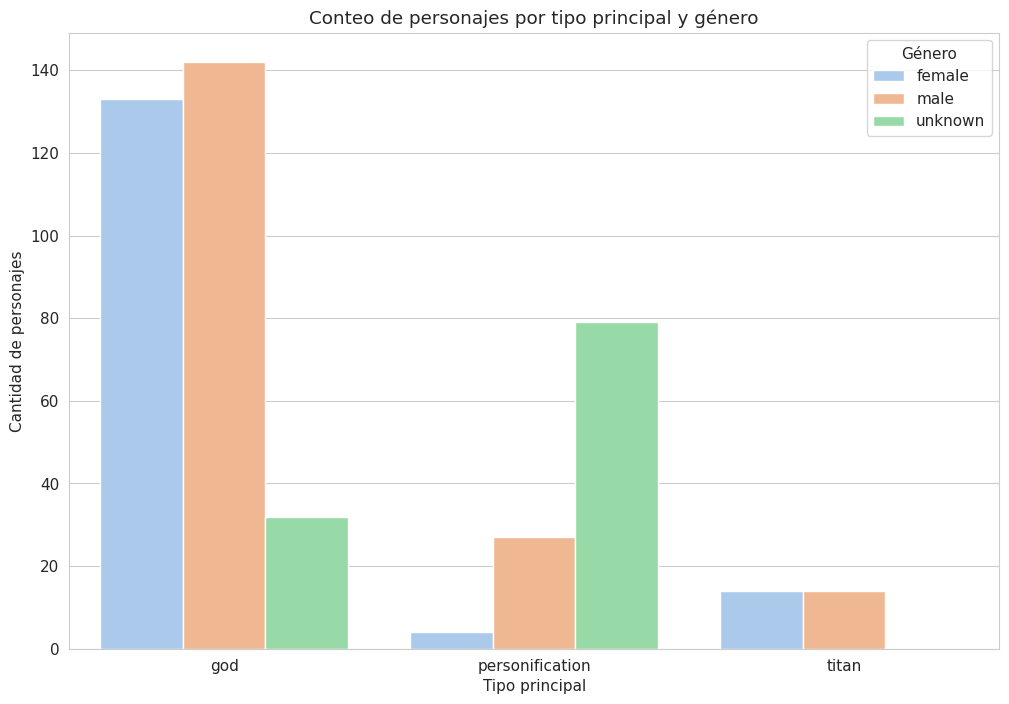

In [34]:
# Crearé un gráfico de barras agrupadas con seaborn para comparar los géneros dentro de cada main-type
sns.barplot(data=grouped_stats, x='main-type', y='name-english', hue='gender', palette='pastel')
plt.title('Conteo de personajes por tipo principal y género')
plt.xlabel('Tipo principal')
plt.ylabel('Cantidad de personajes')
plt.legend(title = 'Género')
plt.show()


### Explicacion del código anterior
* data=grouped_stats: Usamos el DataFrame que ya agrupamos.

* x='main-type': Eje X serán los tipos principales.

* y='name-english': Altura de las barras, el conteo.

* hue='gender': Se separa cada barra por género dentro de cada tipo.

* palette='pastel': Colores suaves y armónicos.

* Ajustamos título y etiquetas para que quede claro.

## Resumen práctico: .groupby() + visualizaciones

In [35]:
# # Uso básico de .groupby()
# grouped = df.groupby(['columna1', 'columna2']).agg({
#     'columna3': 'count',    # puede ser count, sum, mean, max, etc.
#     'columna4': 'mean'
# })
# print(grouped)

# Agrupa por columnas categñoricas
# Aplica funciones de agregacion a columnas numéricas o contar filas


## Visualización básica tras .groupby()

In [36]:
# # grouped_counts = df.groupby(['categoria1', 'categoria2']).size().reset_index(name='counts')

# sns.barplot(data=grouped_counts, x='categoria1', y='counts', hue='categoria2')
# plt.title("Conteos por categoria1 y categoria2")
# plt.show()

# grouped_counts = df.groupby(['categoria1', 'categoria2']).size().reset_index(name='counts')

# sns.barplot(data=grouped_counts, x='categoria1', y='counts', hue='categoria2')
# plt.title("Conteos por categoria1 y categoria2")
# plt.show()

# Usamos .size() para contar filas.

# .reset_index() para convertir el resultado en DataFrame usable para seaborn.

# hue para comparar categorías dentro de cada barra.


##  Visualización con tabla pivote

In [37]:
# pivot = df.pivot_table(index='categoria1', columns='categoria2', values='columna_numérica', aggfunc='count')
# sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt='d')
# plt.title("Mapa de calor con conteos")
# plt.show()

# pivot_table reorganiza datos para mejor visualización.

# annot=True muestra los números en cada celda.

# fmt='d' formatea números como enteros.


## Otros consejos
* Usa .reset_index() para convertir el resultado de .groupby() en DataFrame si quieres manipularlo o graficarlo.

* Siempre añade títulos y etiquetas para que el gráfico sea claro y profesional.

* Experimenta con paletas de colores (cmap) para que el gráfico sea más legible y atractivo.


## (1) Agregaciones adicionales con .agg()
#### Vamos a calcular:

* Cuántos personajes hay (count)

* Longitud media de la descripción (para ver quiénes están mejor documentados)

In [38]:
# Agregaciones por tipo y género
df['desc_length'] = df['description'].astype(str).apply(len)

grouped_stats = df.groupby(['main-type', 'gender']).agg({
    'name-english': 'count',       # número de personajes
    'desc_length': 'mean'          # longitud media de la descripción
}).rename(columns={
    'name-english': 'count',
    'desc_length': 'avg_desc_length'
})

print(grouped_stats)


                         count  avg_desc_length
main-type       gender                         
god             female     133        45.992481
                male       142        50.528169
                unknown     32        26.218750
personification female       4        43.750000
                male        27        49.222222
                unknown     79        38.000000
titan           female      14        52.928571
                male        14        55.714286


##  (2) Visual final (gráfico de barras comparando subtipos)

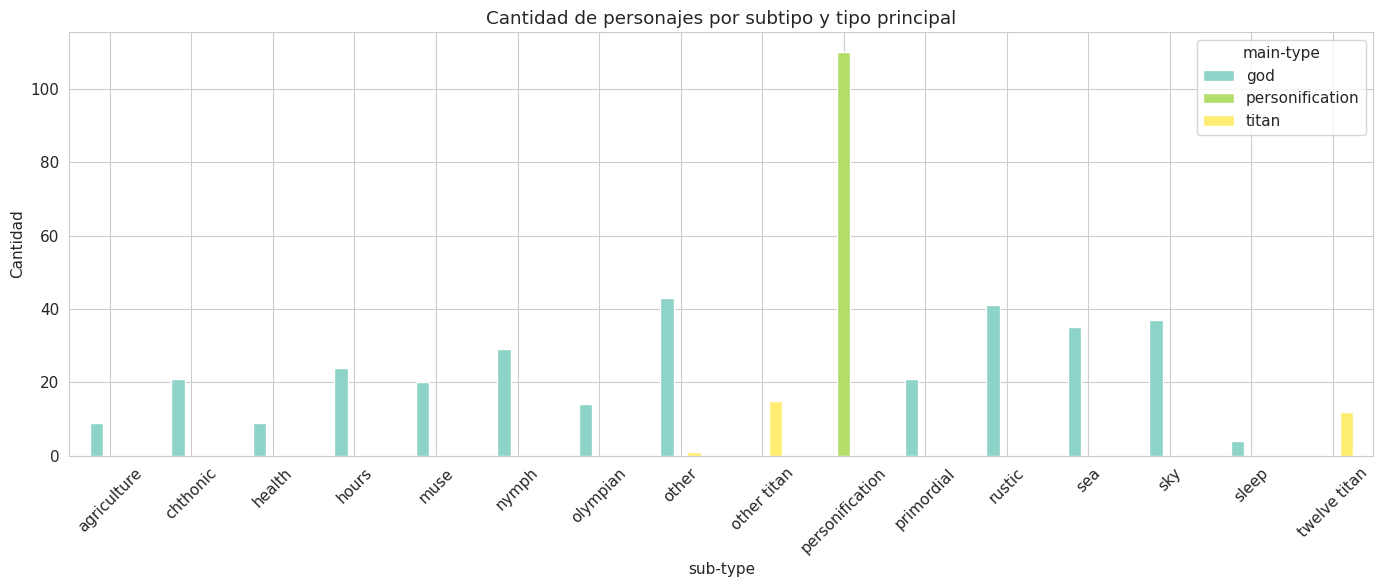

In [39]:
# Conteo de subtipos por tipo principal
pivot = df.pivot_table(index='sub-type', columns='main-type',
                       values='name-english', aggfunc='count', fill_value=0)

pivot.plot(kind='bar', figsize=(14, 6), colormap='Set3')
plt.title("Cantidad de personajes por subtipo y tipo principal")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##  Conclusión rápida:
* - El tipo más representado son los **dioses olímpicos**, seguidos por personificaciones y titanes.
* - Existe un **leve sesgo de género** a favor de los dioses masculinos, especialmente en personificaciones.
* - Muchas entidades tienen género **desconocido**, probablemente por falta de datos o por ser seres neutrales.
* - Las **descripciones más largas** suelen aparecer en dioses y titanes, lo cual puede indicar mayor importancia narrativa.
* - Se recomienda ampliar la descripción de personificaciones y revisar posibles sesgos en las fuentes.
